In [1038]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1039]:
train = pd.read_csv('train.csv')

In [1040]:
test = pd.read_csv('test.csv')

# Analysing data

In [1041]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1042]:
train.describe()
# missing values for age column
# passenger ages between 0.42 and 80
# most passengers have ages between 20 and 38

C:\Users\ionutiliescu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1043]:
test.describe()
# values maintain relatively constant

C:\Users\ionutiliescu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1044]:
train.info()
# cabin information is missing from a significant amount of passengers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1045]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1046]:
train.Cabin.value_counts()
# will drop this column as it is very complex, specific and is missing a lot of values

C23 C25 C27        4
B96 B98            4
G6                 4
D                  3
C22 C26            3
F33                3
F2                 3
E101               3
C65                2
C68                2
D17                2
E33                2
B57 B59 B63 B66    2
B35                2
C123               2
E8                 2
E121               2
C92                2
D20                2
D35                2
B5                 2
E25                2
B20                2
C52                2
C126               2
B77                2
D26                2
C124               2
F G73              2
F4                 2
                  ..
A26                1
E10                1
A34                1
E46                1
B19                1
A14                1
B73                1
D30                1
B69                1
B71                1
D45                1
D37                1
E31                1
B80                1
A20                1
A32                1
B79          

In [1047]:
# dropping the Cabin column
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [1048]:
train[['Survived','Pclass']].groupby('Pclass').mean()
# passengers from 1st class had the highest survival rate

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [1049]:
train[['Survived','Sex']].groupby('Sex').mean()
# females had a higher survival rate

,Survived
Sex,
female,0.742038
male,0.188908


In [1050]:
train[['Survived','Embarked']].groupby('Embarked').mean()
# passengers who embarked from port C had the highest survival rate

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Assumptions:

- Females and toddlers (< 3) are more likely to have survived.
- Old people are more likely to have survived.
- Wealthier individuals (both males and females) are more likely to have survived - based on class and ticket price.
- People who travelled by themselves are less likely to have survived.
- Males from lower classes are less likely to have survived.
- Poorer passengers are less likely to have survived.

# Visualising

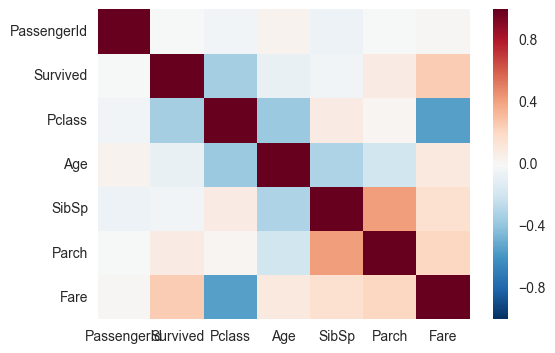

In [1051]:
sns.heatmap(train.corr())
# at first glance, there is a bit of correlation between the survival and the fare price
# will come back at this later once data has been organised

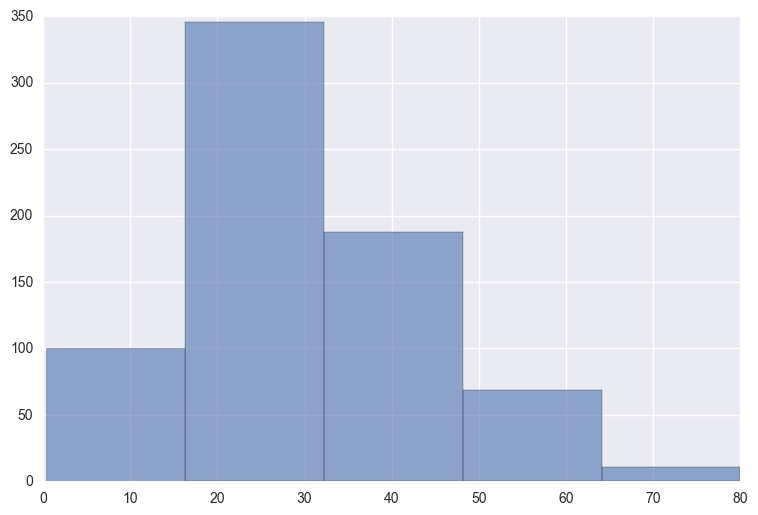

In [1052]:
train.Age.hist(figsize=(9,6),bins=5,alpha=0.6)
# as seen from .describe(), most pasengers are between 20 and 40 years old

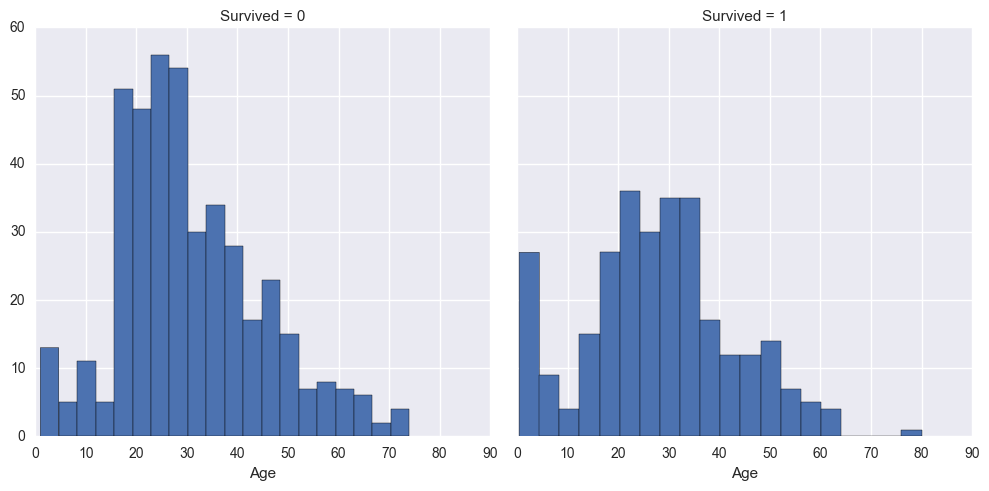

In [1053]:
ages = sns.FacetGrid(train, col='Survived',size=5)
ages.map(plt.hist,'Age',bins=20)
# most toddlers survived
# odlest passengers survived

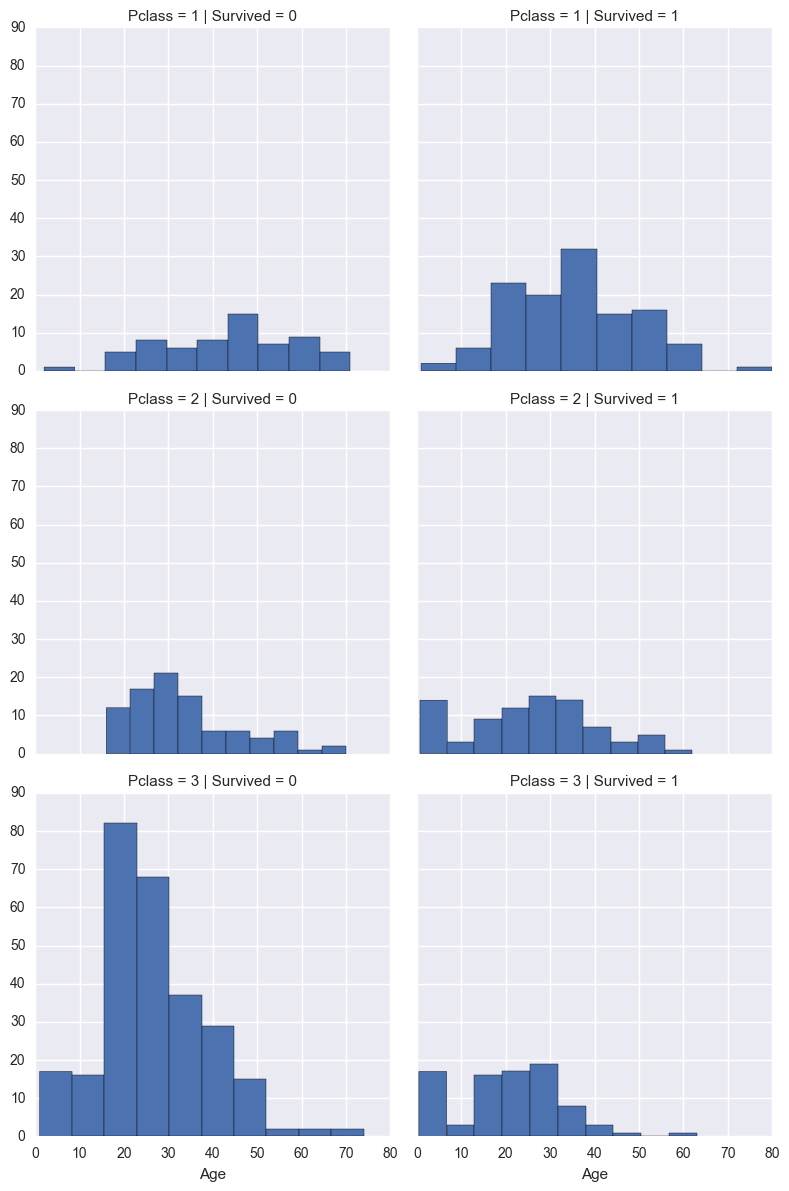

In [1054]:
pcl = sns.FacetGrid(train, col='Survived', row='Pclass',size=4)
pcl.map(plt.hist, 'Age')
# despite the overall number of todlers that survived beign among the highest, 
# there were plenty who didn't survive from 1st and 3rd class

# while in the 2nd and 3rd class, the number passengers between 20 and 40 had the highest non-survival rate,
# in the 1st class they are the ones with the highest survival rates

# Wrangling

In [1055]:
# starting with names, the column will be dropped
# might return and re-run with the titles split
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [1056]:
# changing the Sex column to 0 for males and 1 for females
for i in train.index:
    if train.iloc[i]['Sex'] == 'male':
        train.set_value(i,'Sex',0)
    else:
        train.set_value(i,'Sex',1)

In [1057]:
for i in test.index:
    if test.iloc[i]['Sex'] == 'male':
        test.set_value(i,'Sex',0)
    else:
        test.set_value(i,'Sex',1)

In [1058]:
# sibsp, parch columns will be turned into a single one called family
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [1059]:
# changing from family to whether the person is alone or not
for i in train.index:
    if train.iloc[i]['Family'] != 0:
        train.set_value(i,'Family',1)
for i in test.index:
    if test.iloc[i]['Family'] != 0:
        test.set_value(i,'Family',1)

In [1060]:
# dropping the sibsp and parch column
train.drop('Parch',axis=1,inplace=True)
train.drop('SibSp',axis=1,inplace=True)
test.drop('Parch',axis=1,inplace=True)
test.drop('SibSp',axis=1,inplace=True)

In [1061]:
# ticket column is too complex, dropping it
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [1062]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,0,22.0,7.2500,S,1
1,2,1,1,1,38.0,71.2833,C,1
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,1
4,5,0,3,0,35.0,8.0500,S,1
5,6,0,3,0,NaN,8.4583,Q,1
6,7,0,1,0,54.0,51.8625,S,1
7,8,0,3,0,2.0,21.0750,S,1
8,9,1,3,1,27.0,11.1333,S,1
9,10,1,2,1,14.0,30.0708,C,1


In [1063]:
# changing embarked to numerical values in descending order of survival
# first fill in the gaps
for i in train[train.Embarked.isnull()].index:
    train.set_value(i,'Embarked', 'S')

In [1064]:
train['Embarked'] = train['Embarked'].map( {'C': 3, 'Q': 2, 'S': 1} ).astype(int)

In [1065]:
test['Embarked'] = test['Embarked'].map( {'C': 3, 'Q': 2, 'S': 1} ).astype(int)

In [1066]:
# going back to age, will be converting them from continous to discrete
# <3 - 1
# 3-18 - 2
# 18-31 - 3
# 31-48 - 4
# 48-63 - 5
# 63< - 6

for i in train.index:
    x = train.iloc[i]['Age']
    if x <= 3 or np.isnan(x):
        train.set_value(i,'Age',1)
    elif x > 3 and x <=18:
        train.set_value(i,'Age',2)
    elif x > 18 and x <= 31:
        train.set_value(i,'Age',3)
    elif x > 31 and x <= 48:
        train.set_value(i,'Age',4)
    elif x > 48 and x <= 63:
        train.set_value(i,'Age',5)
    elif x > 63:
        train.set_value(i,'Age',6)

In [1067]:
for i in test.index:
    x = test.iloc[i]['Age']
    if x <= 3 or np.isnan(x):
        test.set_value(i,'Age',1)
    elif x > 3 and x <=18:
        test.set_value(i,'Age',2)
    elif x > 18 and x <= 31:
        test.set_value(i,'Age',3)
    elif x > 31 and x <= 48:
        test.set_value(i,'Age',4)
    elif x > 48 and x <= 63:
        test.set_value(i,'Age',5)
    elif x > 63:
        test.set_value(i,'Age',6)

In [1068]:
# there is one missing value in the test set for fare, will replace it with the mean of all entries for that column
# index = 152
test[test.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
152,1044,3,0,5.0,NaN,1,1


In [1069]:
st = train.Fare.sum()
stt = test[~test.Fare.isnull()]['Fare'].sum()

In [1070]:
ln = len(train.Fare) + len(test[~test.Fare.isnull()])

In [1071]:
test.set_value(152,'Fare',(st + stt)/ln)
test.iloc[152]

PassengerId       1044
Pclass               3
Sex                  0
Age                  5
Fare           33.2955
Embarked             1
Family               1
Name: 152, dtype: object

In [1072]:
# drop passengerids
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [1073]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,3.0,7.2500,1,1
1,1,1,1,4.0,71.2833,3,1
2,1,3,1,3.0,7.9250,1,1
3,1,1,1,4.0,53.1000,1,1
4,0,3,0,4.0,8.0500,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027938D914A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027936AE9C50>]], dtype=object)

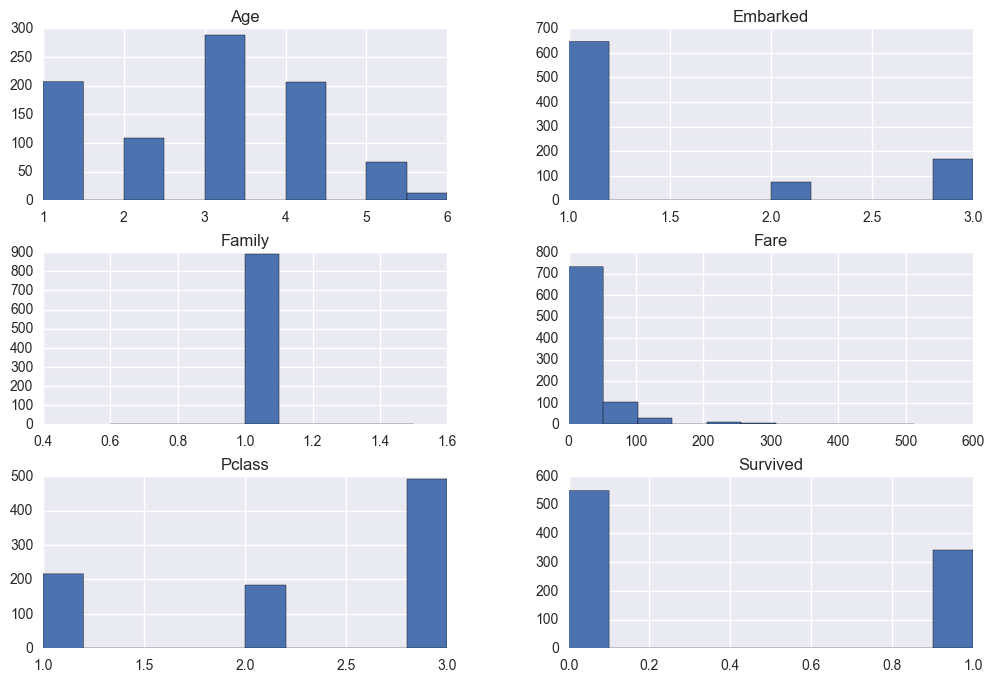

In [1074]:
# one more visualisation before going to predictions
train.hist(figsize=(12,8))

In [1075]:
# splitting into independent and dependent variables
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [1076]:
# encoding dummy variables
from sklearn.preprocessing import OneHotEncoder
# turning the Pclass and Embarked columns into dummy variable columns
hot_e = OneHotEncoder(categorical_features = [4])
X = hot_e.fit_transform(X).toarray()
X = X[:, 1:]
hot_e = OneHotEncoder(categorical_features = [2])
X = hot_e.fit_transform(X).toarray()
X = X[:, 1:]

In [1077]:
# same as above for the test set
test = test.iloc[:,:].values
# turning the Pclass and Embarked columns into dummy variable columns
hot_e = OneHotEncoder(categorical_features = [4])
test = hot_e.fit_transform(test).toarray()
test = test[:, 1:]
hot_e = OneHotEncoder(categorical_features = [2])
test = hot_e.fit_transform(test).toarray()
test = test[:, 1:]

In [1078]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1079]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
test = sc_X.transform(test)

# Predictions

More changes to come!

In [389]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.33, random_state=42)

In [1081]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [1082]:
cls = RandomForestClassifier(random_state=0)

In [1083]:
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1084]:
pred = cls.predict(X_test)

In [1085]:
accuracy_score(y_test, pred)

0.82511210762331844

In [1086]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [1087]:
lg = LogisticRegression()

In [1088]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1089]:
pred = lg.predict(X_test)

In [1090]:
accuracy_score(y_test, pred)

0.76681614349775784

In [1091]:
# SVC

In [1092]:
from sklearn.svm import SVC

In [1093]:
svc = SVC()

In [1094]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1095]:
pred = svc.predict(X_test)

In [1096]:
accuracy_score(y_test, pred)

0.80717488789237668

In [1097]:
# Gradient Boosting - best so far on Kaggle

In [1098]:
from sklearn.ensemble import GradientBoostingClassifier

In [1099]:
gb = GradientBoostingClassifier()

In [1100]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [1101]:
pred = gb.predict(X_test)

In [1102]:
accuracy_score(y_test, pred)

0.80717488789237668

In [1103]:
# Decision trees - same score as Gradient Boosting on Kaggle

In [1104]:
from sklearn.tree import DecisionTreeClassifier

In [1105]:
tr = DecisionTreeClassifier(min_samples_split=17)

In [1106]:
tr.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=17, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1107]:
pred = tr.predict(X_test)

In [1108]:
accuracy_score(y_test, pred)

0.82511210762331844

In [1109]:
# KNN Classifier

In [1110]:
from sklearn.neighbors import KNeighborsClassifier

In [1111]:
kn = KNeighborsClassifier(n_neighbors=20)

In [1112]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [1113]:
pred = kn.predict(X_test)

In [1114]:
accuracy_score(y_test, pred)

0.77578475336322872

In [1115]:
# GaussianNB

In [1116]:
from sklearn.naive_bayes import GaussianNB

In [1117]:
nb = GaussianNB()

In [1118]:
nb.fit(X_train, y_train)

GaussianNB()

In [1126]:
pred = nb.predict(X_test)

In [1127]:
accuracy_score(y_test, pred)

0.74439461883408076

In [1121]:
# setting pred equal to a prediction from one of the algorithms

In [1122]:
pred = nb.predict(test)

In [1123]:
# # exporting the final result
import csv
with open('output.csv','w') as resultFile:
     wr = csv.writer(resultFile, dialect='excel')
     wr.writerow(pred)

PermissionError: [Errno 13] Permission denied: 'output.csv'